## Run bayesian inference

the notebook start by first loading the model config and checking the data, 

then you can run the sampling either in the HPC or in the notebook

In [ ]:
# load the relevant modules for the analysis

import os
from pathlib import Path

import numpy as np
import pandas as pd
from pl_temp_fit import (
    Exp_data_utils,
    config_utils,
    covariance_utils,
    generate_data_utils,
    fit_pl_utils,
)

# access the right directory
os.chdir("/rds/general/user/hy2120/home/pl_temp_fit")
# os.chdir('C:\\Users\\ma11115\\OneDrive - Imperial College London\\pl_temp_fit')

In [ ]:
# get test_ids in the database
path_database = Path("fit_experimental_emcee_pl/fit_data_base/")
model_config_files = list(path_database.glob("*.json"))
test_id_list = []
list_model_config = []
for id, model_config_file in enumerate(model_config_files):
    print(id, model_config_file)
    test_id = model_config_file.name.replace(".json", "")
    test_id_list.append(test_id)
    model_config, model_config_save = config_utils.load_model_config(
        test_id, database_folder=path_database
    )
    print(model_config_save["csv_name_pl"].split("/")[-1])
    list_model_config.append(model_config_save)

if len(list_model_config) == 0:
    print("no data")
else:
    df_all = pd.DataFrame(list_model_config)
    df_all.sort_values(by="date", ascending=False, inplace=True)
df_all["csv_name_pl"] = df_all["csv_name_pl"].apply(lambda x: x.split("/")[-1])
df_all[["csv_name_pl", "params_to_fit_init", "min_bounds", "max_bounds"]].head(
    10
)

0 fit_experimental_emcee_pl/fit_data_base/ecd645fa-efc7-4e7a-b845-e6f4773836ad.json
Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h-21m_Exposure_3.0s.csv
1 fit_experimental_emcee_pl/fit_data_base/653ffe3d-b6a9-43cd-a83d-d46b7b4e1e36.json
Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h-21m_Exposure_3.0s.csv
2 fit_experimental_emcee_pl/fit_data_base/83b748e4-ae81-4499-a876-c21d88c461ba.json
Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h-21m_Exposure_3.0s.csv
3 fit_experimental_emcee_pl/fit_data_base/7faa0c45-ffb9-4c99-89df-421873b93b2c.json
Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h-21m_Exposure_3.0s.csv
4 fit_experimental_emcee_pl/fit_data_base/9fe3b8f3-a533-4bae-93d2-8be4dc28094c.json
Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h-21m_Exposure_3.0s.csv
5 fit_experimental_emcee_pl/fit_data_base/9fb88b09-611c-4a00-a01a-ef969abe8315.json
Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h-21m_Exposure_3.0s.csv
6 fit_experimental_emcee_pl/fit_data_base/dc1f1670-10e4-44cc-abf7-0b607ff282de.jso

,csv_name_pl,params_to_fit_init,min_bounds,max_bounds
0,Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h...,"{'EX': {'E': 1.41, 'sigma': 1, 'Li': 0.078, 'L...","{'EX': {'E': 1.3, 'sigma': 0.5, 'Li': 0.03, 'L...","{'EX': {'E': 1.5, 'sigma': 2, 'Li': 0.2, 'Lo':..."
12,Y6DIO_1mat_sameday_300_G0_700.0nm_1500.0nm_20-...,"{'EX': {'E': 1.41, 'sigma': 0.1, 'Li': 0.078, ...","{'EX': {'E': 1.3, 'sigma': 0.01, 'Li': 0.03, '...","{'EX': {'E': 1.5, 'sigma': 0.2, 'Li': 0.2, 'Lo..."
25,Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h...,"{'EX': {'E': 1.41, 'sigma': 0.05, 'Li': 0.078,...","{'EX': {'E': 1.3, 'sigma': 0.01, 'Li': 0.03, '...","{'EX': {'E': 1.5, 'sigma': 0.1, 'Li': 0.2, 'Lo..."
23,Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h...,"{'EX': {'E': 1.41, 'sigma': 0.05, 'Li': 0.078,...","{'EX': {'E': 1.3, 'sigma': 0.01, 'Li': 0.03, '...","{'EX': {'E': 1.5, 'sigma': 0.1, 'Li': 0.2, 'Lo..."
21,Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h...,"{'EX': {'E': 1.41, 'sigma': 1, 'Li': 0.078, 'L...","{'EX': {'E': 1.3, 'sigma': 0.5, 'Li': 0.03, 'L...","{'EX': {'E': 1.5, 'sigma': 2, 'Li': 0.2, 'Lo':..."
16,Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h...,"{'EX': {'E': 1.41, 'sigma': 0.05, 'Li': 0.078,...","{'EX': {'E': 1.3, 'sigma': 0.01, 'Li': 0.03, '...","{'EX': {'E': 1.5, 'sigma': 0.1, 'Li': 0.2, 'Lo..."
15,Y6DIO_1mat_sameday_300_G0_700.0nm_1500.0nm_20-...,"{'EX': {'E': 1.41, 'sigma': 1, 'Li': 0.078, 'L...","{'EX': {'E': 1.3, 'sigma': 0.5, 'Li': 0.03, 'L...","{'EX': {'E': 1.5, 'sigma': 2, 'Li': 0.2, 'Lo':..."
27,Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h...,"{'EX': {'E': 1.41, 'sigma': 0.05, 'Li': 0.078,...","{'EX': {'E': 1.3, 'sigma': 0.01, 'Li': 0.03, '...","{'EX': {'E': 1.5, 'sigma': 0.1, 'Li': 0.2, 'Lo..."
2,Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h...,"{'EX': {'E': 1.41, 'sigma': 0.05, 'Li': 0.078,...","{'EX': {'E': 1.3, 'sigma': 0.01, 'Li': 0.03, '...","{'EX': {'E': 1.5, 'sigma': 0.1, 'Li': 0.2, 'Lo..."
4,Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h...,"{'EX': {'E': 1.41, 'sigma': 0.05, 'Li': 0.078,...","{'EX': {'E': 1.3, 'sigma': 0.01, 'Li': 0.03, '...","{'EX': {'E': 1.5, 'sigma': 0.1, 'Li': 0.2, 'Lo..."


In [ ]:
search_for = "Y6"
df_all[df_all["csv_name_pl"].str.contains(search_for)][
    ["csv_name_pl", "params_to_fit_init", "min_bounds", "max_bounds"]
]


,csv_name_pl,params_to_fit_init,min_bounds,max_bounds
4,Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h...,"{'EX': {'E': 1.41, 'Li': 0.078, 'Lo': 0.11, 'h...","{'EX': {'E': 1.3, 'Li': 0.03, 'Lo': 0.03, 'hO'...","{'EX': {'E': 1.5, 'Li': 0.2, 'Lo': 0.2, 'hO': ..."
6,Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h...,"{'EX': {'E': 1.41, 'sigma': 0.04, 'Li': 0.078,...","{'EX': {'E': 1.3, 'sigma': 0.001, 'Li': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.1, 'Li': 0.2, 'Lo..."
8,Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h...,"{'EX': {'E': 1.41, 'sigma': 0.04, 'Li': 0.078,...","{'EX': {'E': 1.3, 'sigma': 0.001, 'Li': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.1, 'Li': 0.2, 'Lo..."
5,Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h...,"{'EX': {'E': 1.41, 'sigma': 0.04, 'Li': 0.078,...","{'EX': {'E': 1.3, 'sigma': 0.001, 'Li': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.1, 'Li': 0.2, 'Lo..."
7,Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h...,"{'EX': {'E': 1.41, 'sigma': 0.04, 'Li': 0.078,...","{'EX': {'E': 1.3, 'sigma': 0.001, 'Li': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.1, 'Li': 0.2, 'Lo..."
0,Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h...,"{'EX': {'E': 1.41, 'sigma': 0.04, 'Li': 0.078,...","{'EX': {'E': 1.3, 'sigma': 0.001, 'Li': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.1, 'Li': 0.2, 'Lo..."
2,Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h...,"{'EX': {'E': 1.41, 'sigma': 0.04, 'Li': 0.078,...","{'EX': {'E': 1.3, 'sigma': 0.001, 'Li': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.1, 'Li': 0.2, 'Lo..."
3,Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h...,"{'EX': {'E': 1.41, 'sigma': 0.04, 'Li': 0.078,...","{'EX': {'E': 1.3, 'sigma': 0.001, 'Li': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.1, 'Li': 0.2, 'Lo..."
1,Y6_1mat_300_G0_700.0nm_1500.0nm_20-06-2024-16h...,"{'EX': {'E': 1.41, 'sigma': 0.04, 'Li': 0.078,...","{'EX': {'E': 1.3, 'sigma': 0.001, 'Li': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.1, 'Li': 0.2, 'Lo..."


In [ ]:
import importlib

# load and update the model config
importlib.reload(config_utils)
test_id = test_id_list[12]
model_config, model_config_save = config_utils.load_model_config(
    test_id, database_folder=path_database
)
csv_name = model_config_save["csv_name_pl"]
print(model_config_save["csv_name_pl"].split("/")[-1])
# add the new experimental data

# model_config_save["save_folder"] = "/media/mohammed/Work/pl_temp_fit/fit_experimental_emcee_pl/fit_data/Y6DIB-1mat-300K_G0_700/86ee9cec-3710-4392-9d7c-79d243f1b208"
# model_config_save["csv_name_pl"] = "/media/mohammed/Work/fit_pl_database_Hanbo/cryostat/60-300K/Y6DIB-1mat-300K_G0_700.0nm_1500.0nm_21-06-2024-17h-49m_Exposure_3.0s_mod_split0_split500.csv"
model_config_save["max_abs_pos_exp"] = 1.52
model_config_save["error_in_max_abs_pos"] = 0.01  # in eV
model_config_save["lifetime_exp_high_temp"] = 0.65e-9  # in seconds
model_config_save["error_in_lifetime_high_temp"] = 1e-10  # in seconds
config_utils.updata_model_config(test_id, path_database, model_config_save)

Y6DIO_1mat_sameday_300_G0_700.0nm_1500.0nm_20-06-2024-16h-15m_Exposure_3.0s.csv


'3dd5cecd-5f63-4ad3-84f1-93f66e545bcf'

In [ ]:
model_config_id = test_id
csv_name = model_config_save["csv_name_pl"]
results_name = csv_name.replace(".csv", "").split("/")[-1]
sh_name = f"Run_EMCEE_{results_name}.sh"
script = (
    "#!/bin/bash \n"
    + "#PBS -l walltime=07:59:01 \n"
    + "#PBS -l select=1:ncpus=32:mem=80gb:avx=true \n"
    + " \n"
    + "cd /rds/general/user/hy2120/home/pl_temp_fit \n"
    + "module load anaconda3/personal \n"
    + "source activate pl_temp_fit     \n"
    + f"python src/pl_temp_fit/scripts/new_pl_sampling.py --model_config_id {model_config_id} \n"
)  # ${'PBS_ARRAY_INDEX'}#f"#PBS -J 1-{16} \n"+\
print(script)
with open(f"HPC_bash_script/{sh_name}", "wb") as f:
    f.write(bytes(script, "utf-8"))
script = (
    f"qsub  -e ./cache -o ./cache HPC_bash_script/{sh_name}"  # submit to HPC
)
os.system(script)

#!/bin/bash 
#PBS -l walltime=07:59:01 
#PBS -l select=1:ncpus=32:mem=80gb:avx=true 
 
cd /rds/general/user/hy2120/home/pl_temp_fit 
module load anaconda3/personal 
source activate pl_temp_fit     
python src/pl_temp_fit/scripts/new_pl_sampling.py --model_config_id dc1f1670-10e4-44cc-abf7-0b607ff282de 

74829.pbs


0

shape of mean value plot is (95, 7)


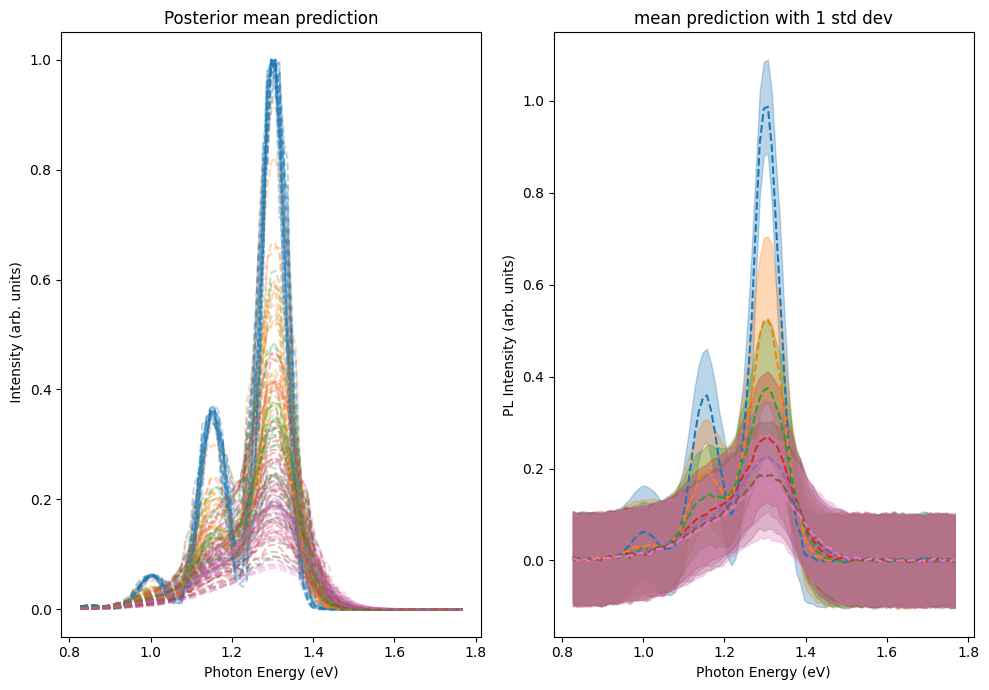

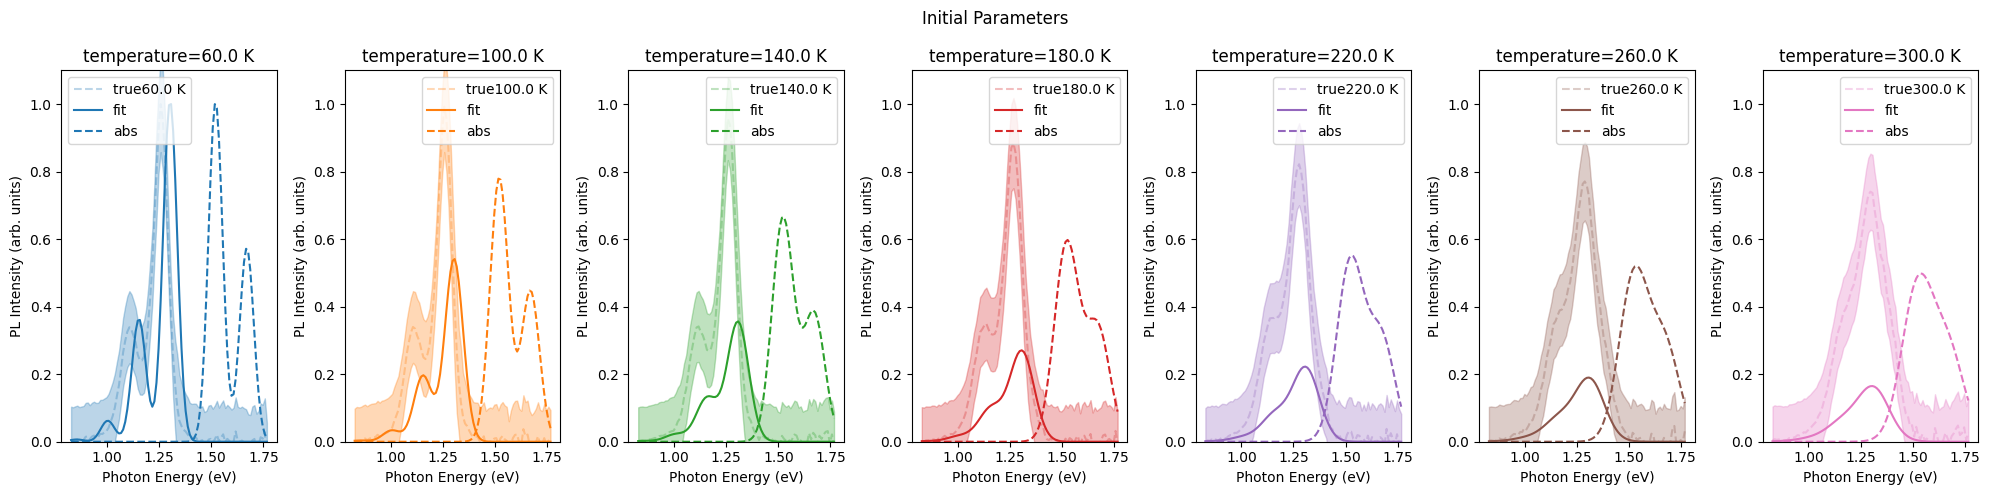

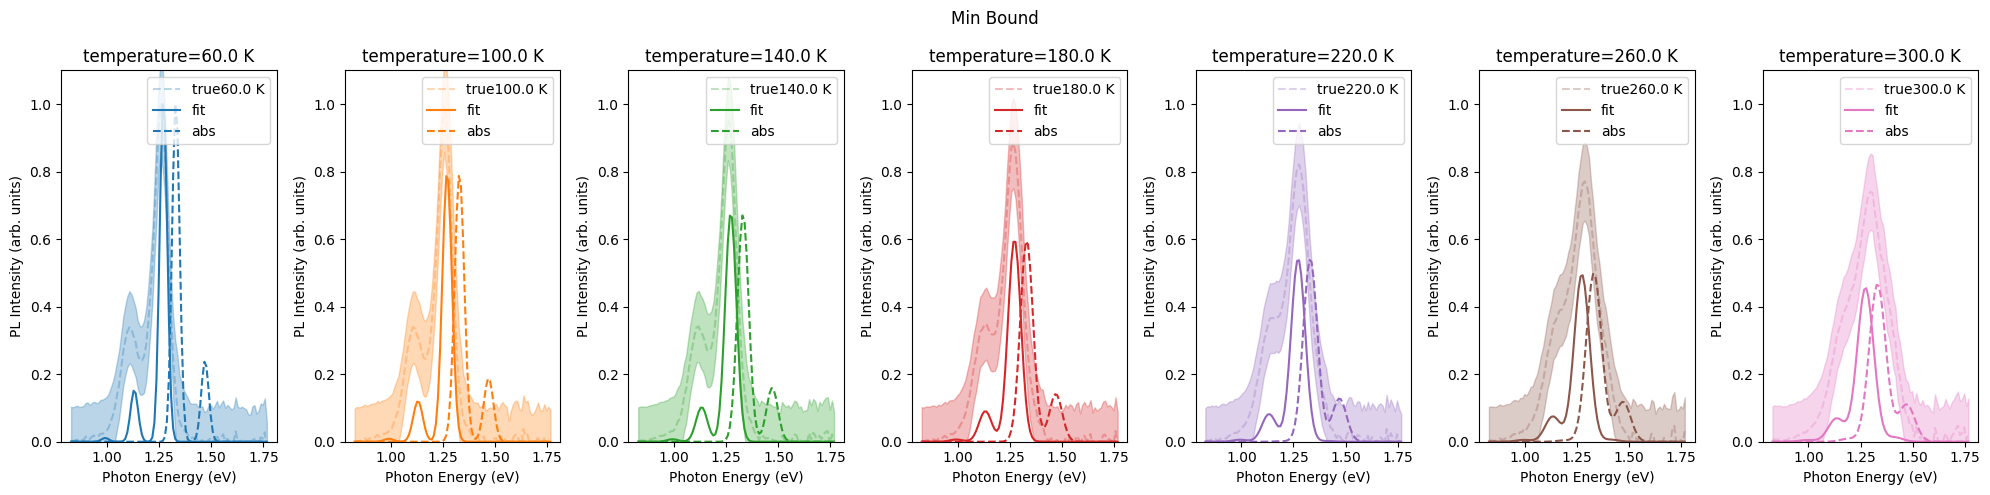

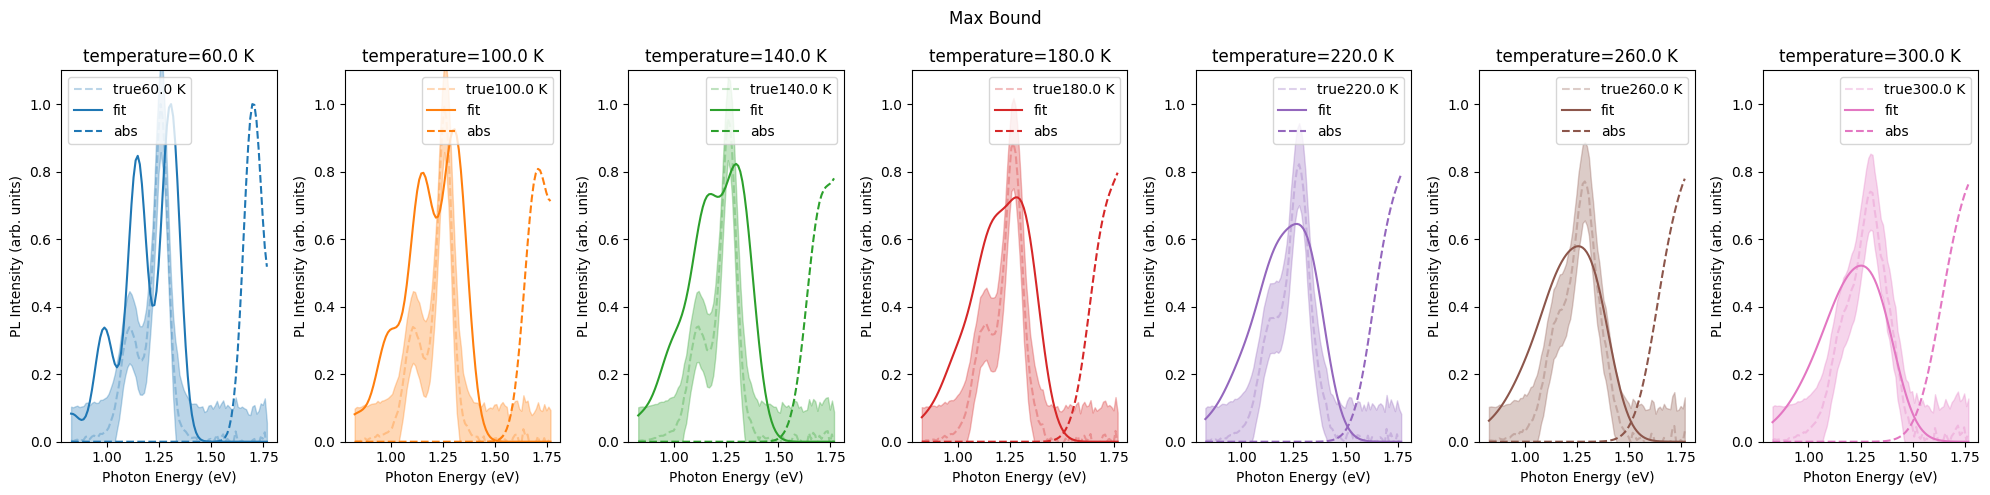

In [ ]:
# plot the results with initial parameters
# and the maximum and minumum bounds
import importlib

from pl_temp_fit import fit_pl_utils

importlib.reload(fit_pl_utils)

fit_pl_utils.plot_fit_limits(model_config, model_config_save)


Y6-brilliantmat-sameday-fresh-300K_G0.csv


'677958b1-72d0-4144-99af-8e56157c1277'

### run sampler in the notebook

In [ ]:
import emcee

filename = model_config_save["save_folder"] + "/sampler.h5"
if os.path.exists(filename):
    try:
        reader = emcee.backends.HDFBackend(filename, name="multi_core")
        distribution = reader.get_chain(discard=0, flat=True)
        true_parameters = fit_pl_utils.get_param_dict(
            model_config_save["params_to_fit_init"], distribution[-1]
        )
    except AttributeError:
        print("no sampler found")

        true_parameters = model_config_save["params_to_fit_init"]
else:
    true_parameters = model_config_save["params_to_fit_init"]
    print("no sampler found")

In [ ]:
import importlib
from pl_temp_fit.data_generators import (
    PLAbsAndLifetime,
    SpectralDataGeneration,
)

importlib.reload(SpectralDataGeneration)
importlib.reload(PLAbsAndLifetime)
save_folder = model_config_save["save_folder"]
csv_name = model_config_save["csv_name_pl"]

Exp_data, temperature_list, hws = Exp_data_utils.read_data(csv_name)

pl_data_gen = PLAbsAndLifetime.PLAbsAndLifetime(temperature_list, hws)


# pl_data_gen.error_in_lifetime_high_temp = model_config_save["error_in_lifetime_high_temp"]
# pl_data_gen.error_in_max_abs_pos = model_config_save["error_in_max_abs_pos"]
# pl_data_gen.max_abs_pos_exp = model_config_save["max_abs_pos_exp"]
# pl_data_gen.lifetime_exp_high_temp = model_config_save["lifetime_exp_high_temp"]


pl_data_gen.update_with_model_config(model_config_save)
co_var_mat_pl, variance_pl = pl_data_gen.get_covariance_matrix()


In [ ]:
class State:
    def __init__(self, E, numbrstates, disorder_ext):
        self.E = E
        self.numbrstates = numbrstates
        self.disorder_ext = disorder_ext
        self.DG0 = self.calculate_DG0()

    def calculate_DG0(self):
        if self.numbrstates == 1:
            return np.array([self.E])
        else:
            return np.linspace(
                self.E - self.disorder_ext,
                self.E + self.disorder_ext,
                self.numbrstates,
            )


state_instance = State(E=1.4, numbrstates=20, disorder_ext=0.1)

# Printing the length of the DG0 array
print("Length of DG0:", len(state_instance.DG0))

Length of DG0: 20


In [ ]:
# test log likelihood
from pl_temp_fit import Emcee_utils, fit_pl_utils, FitUtils

save_folder = model_config_save["save_folder"]

inv_cov_pl = np.linalg.inv(co_var_mat_pl)
coords, backend = FitUtils.get_initial_coords(
    pl_data_gen,
    coeff_spread=0.1,
    num_coords=32,
    save_folder=save_folder,
    restart_sampling=True,
)
log_like, chi_squared, data = pl_data_gen.log_likelihood(
    coords[0],
    Exp_data,
    inv_cov_pl,
)
data.D.hw[data.D.alpha[:, -1].argmax()]

np.float64(1.56)

In [ ]:
from pl_temp_fit import Emcee_utils, fit_pl_utils, FitUtils

importlib.reload(generate_data_utils)
importlib.reload(covariance_utils)
importlib.reload(FitUtils)
importlib.reload(fit_pl_utils)

save_folder = model_config_save["save_folder"]

fit_pl_utils.run_sampler_parallel(
    save_folder,
    Exp_data,
    co_var_mat_pl,
    pl_data_gen,
    nsteps=1000,
    coeff_spread=0.1,
    num_coords=32,
    restart_sampling=True,
    num_processes=30,
)

100%|██████████| 1000/1000 [46:25<00:00,  2.79s/it]

multi process took 2790.2 seconds


In [ ]:
from pl_temp_fit import Emcee_utils, fit_pl_utils

importlib.reload(generate_data_utils)
importlib.reload(covariance_utils)
importlib.reload(fit_pl_utils)
importlib.reload(Emcee_utils)

filename = model_config_save["save_folder"] + "/sampler_single.h5"
if os.path.exists(filename):
    reader = emcee.backends.HDFBackend(filename, name="multi_core")
    distribution = reader.get_chain(discard=0, flat=True)
    true_parameters = fit_pl_utils.get_param_dict(
        model_config_save["params_to_fit_init"], distribution[-1]
    )
else:
    true_parameters = model_config_save["params_to_fit_init"]
    print("no sampler found")
save_folder = model_config_save["save_folder"] + "/single_core"
os.makedirs(save_folder, exist_ok=True)
fit_pl_utils.run_sampler_single(
    save_folder,
    Exp_data,
    co_var_mat_pl,
    pl_data_gen,
    nsteps=5,
    coeff_spread=0.1,
    num_coords=32,
    restart_sampling=False,
)

no sampler found


100%|██████████| 5/5 [01:20<00:00, 16.17s/it]

single process took 97.0 seconds


In [ ]:
soln_min = pl_data_gen.get_maximum_likelihood_estimate(
    Exp_data,
    co_var_mat_pl,
    save_folder,
    coeff_spread=0.1,
    num_coords=5,
)

running the minimisation
step 0
step 1
step 2
step 3
step 4
[1.40943154 0.09752824 0.07618101 0.10920933 0.14959644]
Maximum likelihood estimates:
  EX_E = 1.409
  EX_sigma = 0.098
  EX_Li = 0.076
  EX_Lo = 0.109
  EX_hO = 0.150
Maximum log likelihood: 316.6758585704517


### run sampling in the HPC


In [ ]:
model_config_id = test_id
csv_name = model_config_save["csv_name_pl"]
results_name = csv_name.replace(".csv", "").split("/")[-1]
sh_name = f"Run_EMCEE_{results_name}.sh"
script = (
    "#!/bin/bash \n"
    + "#PBS -l walltime=07:59:01 \n"
    + "#PBS -l select=1:ncpus=32:mem=80gb:avx=true \n"
    + " \n"
    + "cd /rds/general/user/hy2120/home/pl_temp_fit \n"
    + "module load anaconda3/personal \n"
    + "source activate pl_temp_fit     \n"
    + f"python src/pl_temp_fit/scripts/new_pl_sampling.py --model_config_id {model_config_id} \n"
)  # ${'PBS_ARRAY_INDEX'}#f"#PBS -J 1-{16} \n"+\
print(script)
with open(f"HPC_bash_script/{sh_name}", "wb") as f:
    f.write(bytes(script, "utf-8"))
script = (
    f"qsub  -e ./cache -o ./cache HPC_bash_script/{sh_name}"  # submit to HPC
)
os.system(script)

#!/bin/bash 
#PBS -l walltime=07:59:01 
#PBS -l select=1:ncpus=32:mem=80gb:avx=true 
 
cd /rds/general/user/hy2120/home/pl_temp_fit 
module load anaconda3/personal 
source activate pl_temp_fit     
python src/pl_temp_fit/scripts/new_pl_sampling.py --model_config_id 85668a82-702f-4c46-9a33-8f39a075571d 

25981.pbs


0

to run the scipt using the hpc you can just submit the job above

if you want ot run the job on the terminal you can run the script from the folder of pl_temp_fit using  for example

        python src/pl_temp_fit/scripts/run_pl_sampling.py --model_config_id e7ed53f3-f1ef-46c2-9b98-35b366e9f04d 

where e7ed53f3-f1ef-46c2-9b98-35b366e9f04d  correspond to your model config id